Daftar Isi
1) Mengumpulkan Data
2) Menelaah Data
3) Memvalidasi Data
4) Menetukan Object Data
5) Membersihkan Data
6) Mengkonstruksi Data
7) Menentukan Label Data
8) Membangun Model
9) Mengevaluasi Hasil Pemodelan

In [1]:
# Langkah 1: Mengimpor Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset

# Jika data dari file lokal
file_path = "post-operative-new.data"  # Ganti dengan path file Anda
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dibaca.")
    # Anda dapat melanjutkan dengan operasi pada dataset_clean di sini
    print(df.head()) # Menampilkan beberapa baris pertama dataset
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di path: {file_path}")
except Exception as e:
    print(f"Terjadi kesalahan saat membaca file: {e}")

Dataset berhasil dibaca.
   0   mid   low  excellent mid.1  stable  stable.1    stable.2  15   A
0  1   mid  high  excellent  high  stable    stable      stable  10   S
1  2  high   low  excellent  high  stable    stable  mod-stable  10   A
2  3   mid   low       good  high  stable  unstable  mod-stable  15  A 
3  4   mid   mid  excellent  high  stable    stable      stable  10   A
4  5  high   low       good   mid     NaN    stable    unstable  15   S


In [3]:
# LANGKAH 2 : MASUKAN NAMA FITUR
# Change this line:
# dataset.columns=["PATIENT_NUMBER","L-CORE","L-SURF","L-O2","L-BP","SURF-STBL","CORE-STBL","BP-STBL","COMFORT","decision ADM-DECS"]

# To:
df.columns = ["PATIENT_NUMBER","L-CORE","L-SURF","L-O2","L-BP","SURF-STBL","CORE-STBL","BP-STBL","COMFORT","decision ADM-DECS"] # Replace 'dataset' with 'df'

In [4]:
df.head()

PATIENT_NUMBER L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL  \
0               1    mid   high  excellent  high    stable    stable   
1               2   high    low  excellent  high    stable    stable   
2               3    mid    low       good  high    stable  unstable   
3               4    mid    mid  excellent  high    stable    stable   
4               5   high    low       good   mid       NaN    stable   

      BP-STBL COMFORT decision ADM-DECS  
0      stable      10                 S  
1  mod-stable      10                 A  
2  mod-stable      15                A   
3      stable      10                 A  
4    unstable      15                 S

In [5]:
# Langkah 3: Menelaah Data
print("Menampilkan 5 data teratas:")
print(df.head())

print("\nInformasi dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())

Menampilkan 5 data teratas:
   PATIENT_NUMBER L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL  \
0               1    mid   high  excellent  high    stable    stable   
1               2   high    low  excellent  high    stable    stable   
2               3    mid    low       good  high    stable  unstable   
3               4    mid    mid  excellent  high    stable    stable   
4               5   high    low       good   mid       NaN    stable   

      BP-STBL COMFORT decision ADM-DECS  
0      stable      10                 S  
1  mod-stable      10                 A  
2  mod-stable      15                A   
3      stable      10                 A  
4    unstable      15                 S  

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PATIENT_NUMBER     89 non-null     int64 
 1   L-CORE            

In [6]:
# Langkah 4: Memvalidasi Data
# Memeriksa nilai yang hilang (missing value)
print("\nMemeriksa nilai yang hilang:")
print(df.isnull().sum())


Memeriksa nilai yang hilang:
PATIENT_NUMBER       0
L-CORE               0
L-SURF               0
L-O2                 9
L-BP                 0
SURF-STBL            9
CORE-STBL            0
BP-STBL              0
COMFORT              9
decision ADM-DECS    1
dtype: int64


In [7]:
# Menangani nilai yang hilang (jika ada)

# Dalam contoh ini, kita akan mengisi nilai yang hilang dengan median (jika ada kolom dengan missing value)
if df.isnull().sum().any():
    df.select_dtypes(include=np.number).columns
    print("Nilai yang hilang telah diisi dengan median.")

Nilai yang hilang telah diisi dengan median.


In [8]:
# Langkah 5: Membersihkan Data
# Menghapus data duplikat jika ada
df = df.drop_duplicates()
print(f"\nJumlah data setelah menghapus duplikasi: {df.shape[0]} baris")


Jumlah data setelah menghapus duplikasi: 89 baris


In [9]:
# Langkah 6 : Memeriksa duplikasi
print("\nMemeriksa data duplikat:")
print(df.duplicated().sum())


Memeriksa data duplikat:
0


In [10]:
# Membuat visualisasi boxplot (diagram kotak) untuk semua kolom numerik yang diberikan
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 #Menghitung Jumlah Baris Grafik
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) # Membuat grid subplots dengan ukuran yang sesuai
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col]) # Iterasi Kolom Numerik untuk Membuat Boxplot
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    # Penentuan posisi subplot dalam grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) # Menghapus Grafik Kosong

    # Penyesuaian Layout
    plt.tight_layout()
    plt.show()

Semua kolom: Index(['PATIENT_NUMBER', 'L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL',
       'CORE-STBL', 'BP-STBL', 'COMFORT', 'decision ADM-DECS'],
      dtype='object')


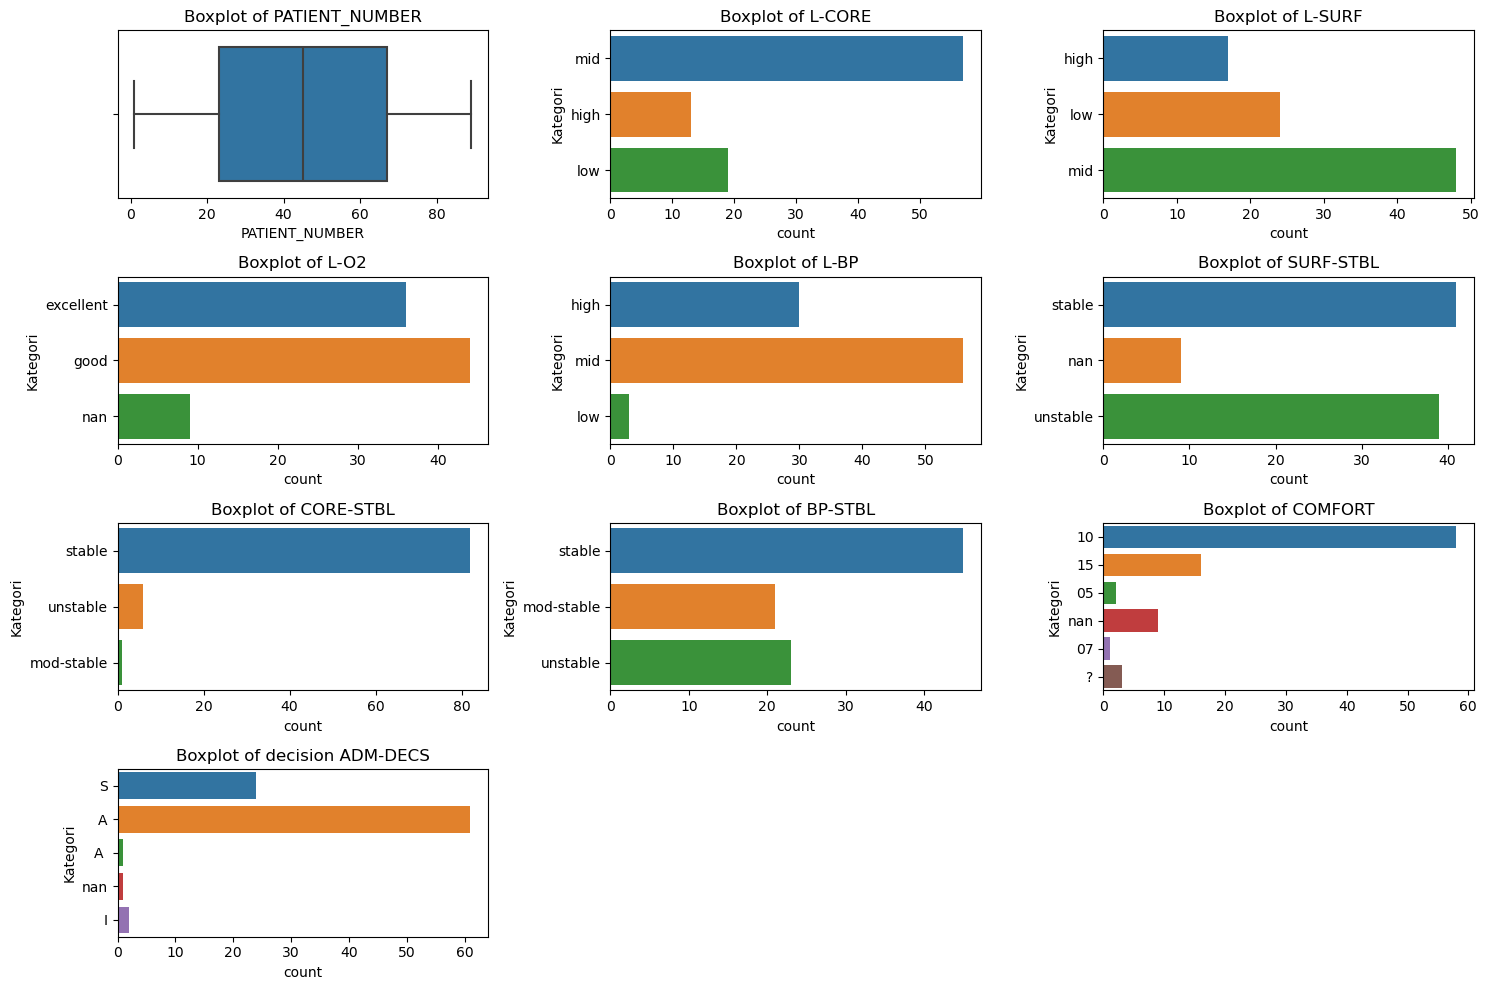

In [11]:
# Menjalankan fungsi boxplot yang telah dijelaskan sebelumnya pada dataframe data dan kolom-kolom numerik yang ada pada num_cols

# Pilih semua kolom (termasuk non-numerik)
all_columns = df.columns
print(f"Semua kolom: {all_columns}")

# Hitung grid subplot
num_cols = 3
num_rows = int(np.ceil(len(all_columns) / num_cols))

plt.figure(figsize=(15, 10))
for i, column in enumerate(all_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column])  # Boxplot untuk numerik
    else:
        sns.countplot(y=df[column].astype(str))
        plt.ylabel('Kategori')  # Konversi kolom kategori ke string
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [12]:
# Memeriksa kembali dataset setelah pembersihan
print("\nData setelah pembersihan:")
print(df.info())


Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PATIENT_NUMBER     89 non-null     int64 
 1   L-CORE             89 non-null     object
 2   L-SURF             89 non-null     object
 3   L-O2               80 non-null     object
 4   L-BP               89 non-null     object
 5   SURF-STBL          80 non-null     object
 6   CORE-STBL          89 non-null     object
 7   BP-STBL            89 non-null     object
 8   COMFORT            80 non-null     object
 9   decision ADM-DECS  88 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.1+ KB
None


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


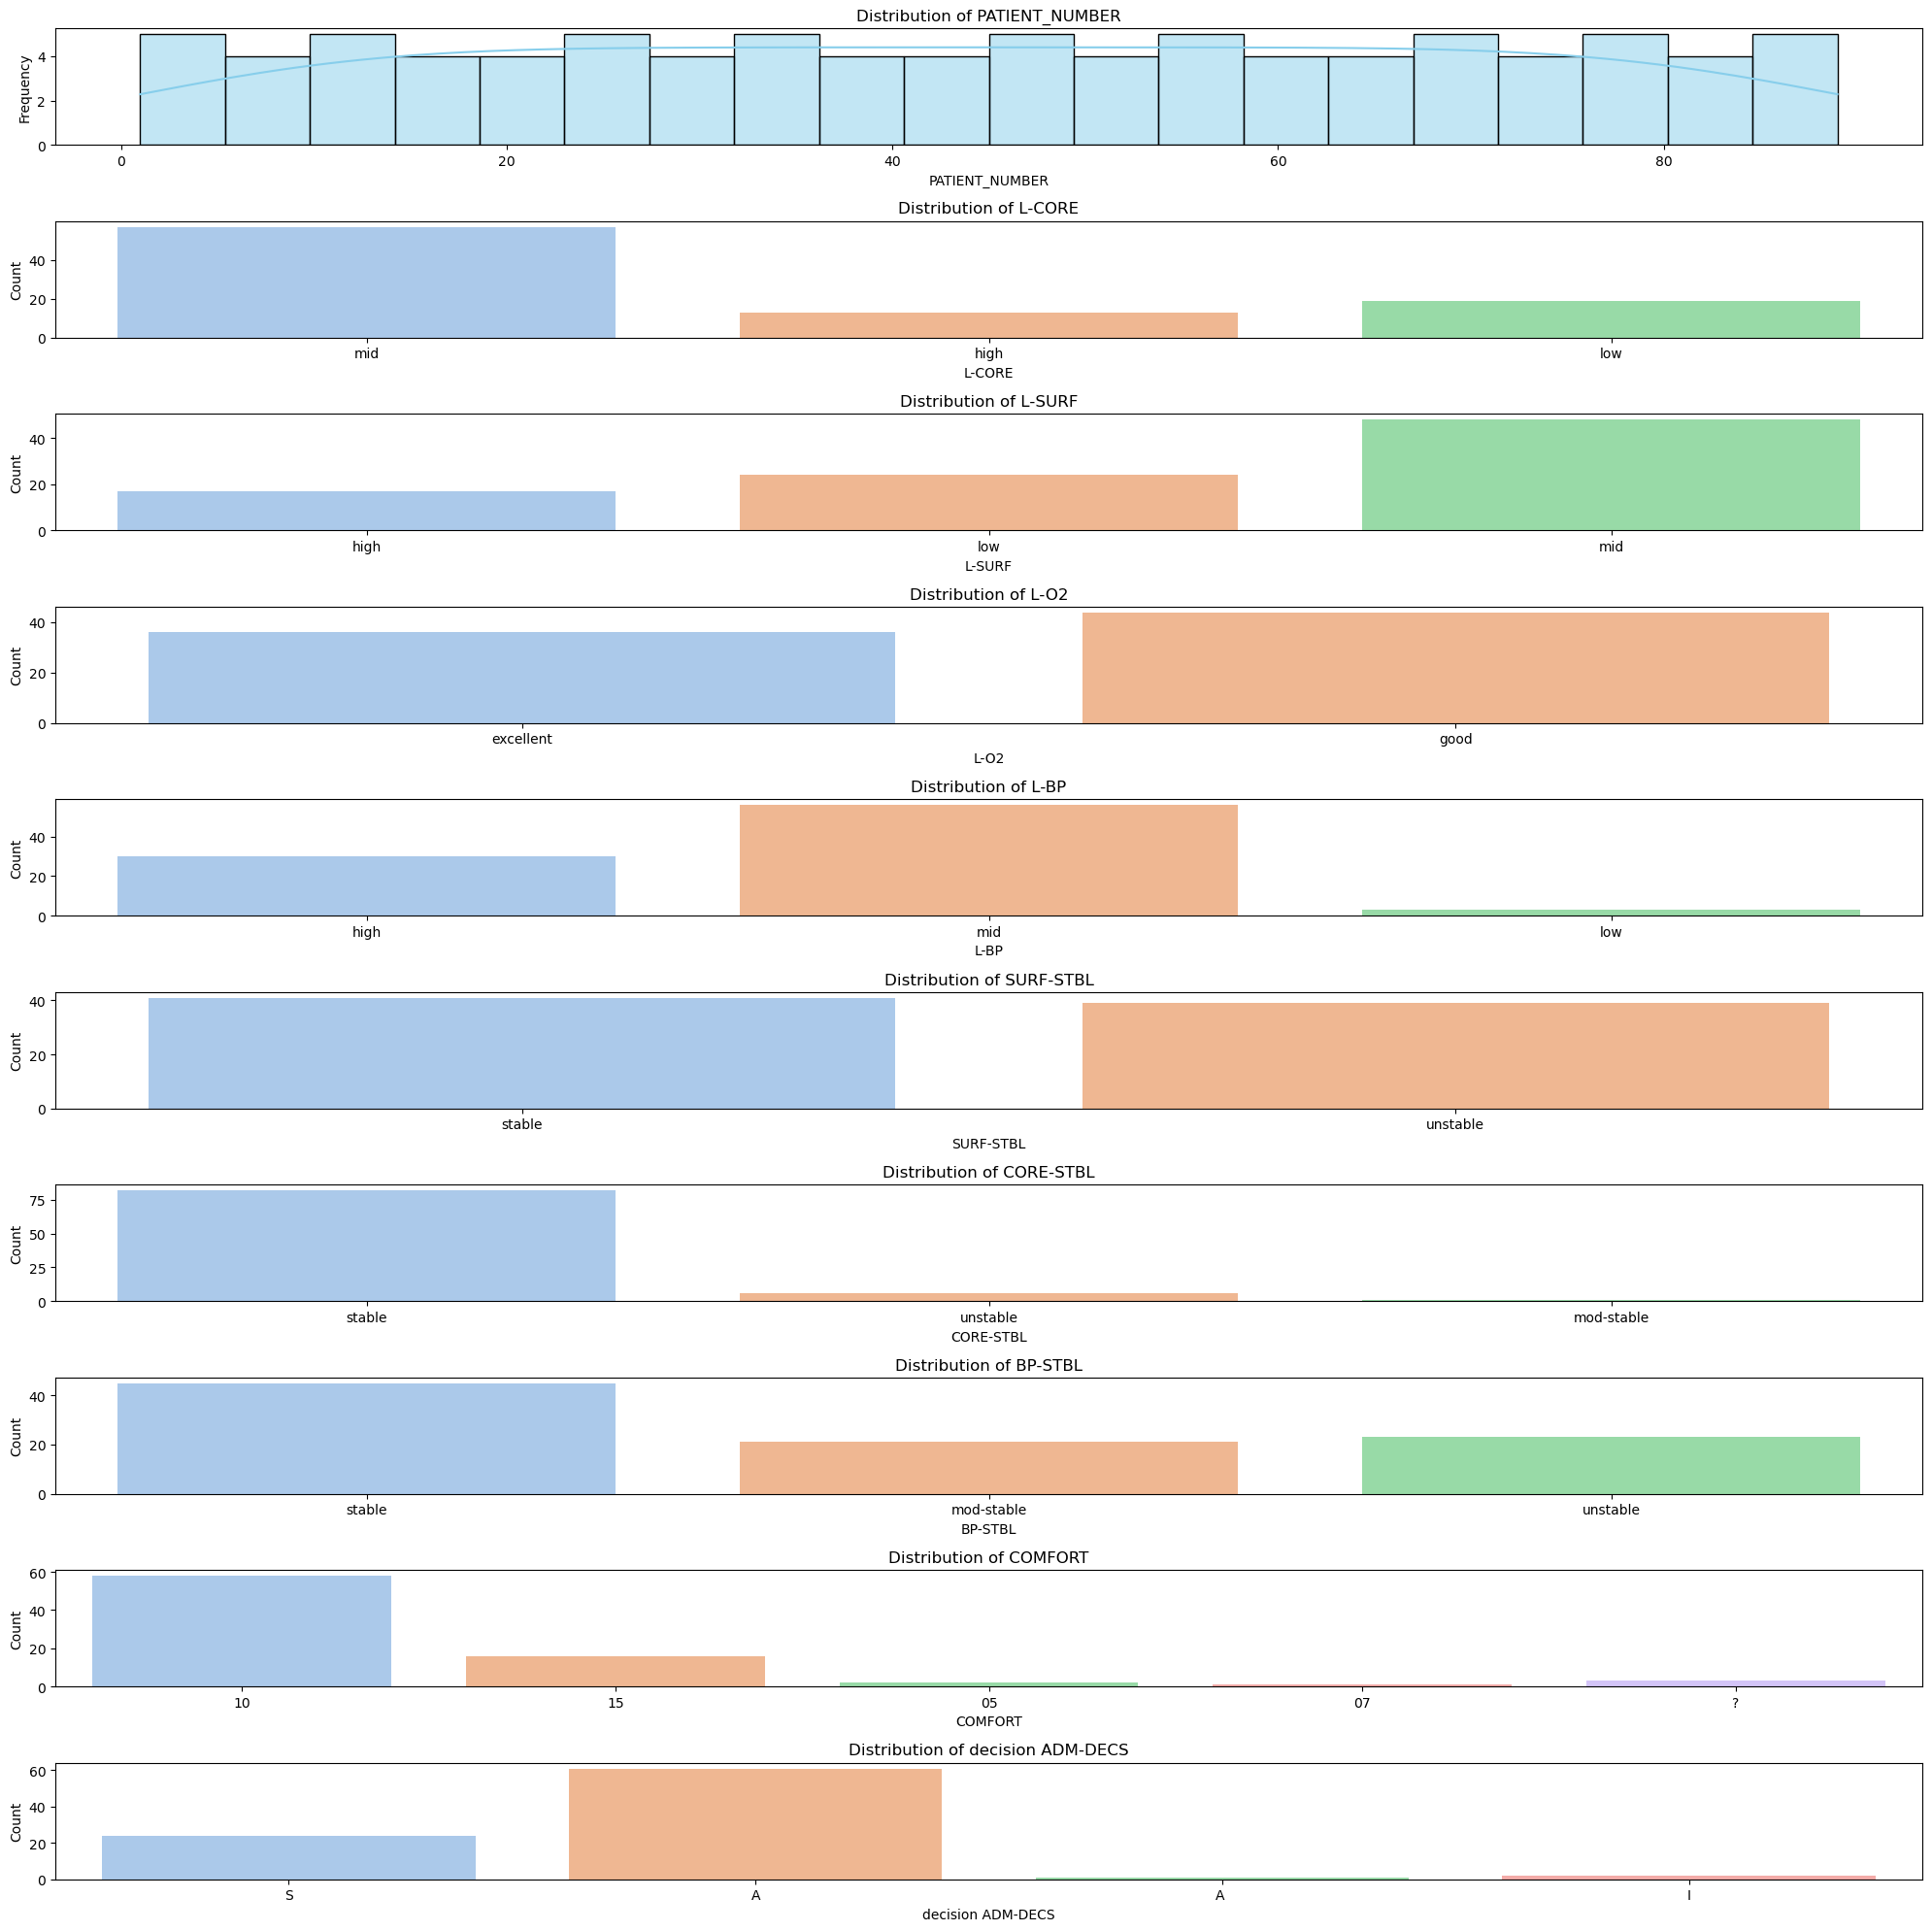

In [13]:
# Langkah 7 : Visualisasi sederhana untuk melihat distribusi data
# Periksa tipe data
numeric_columns = df.select_dtypes(include=['number']).columns  # Kolom numerik
categorical_columns = df.select_dtypes(exclude=['number']).columns  # Kolom kategori

# Tentukan ukuran figure
plt.figure(figsize=(20, 20))

# Visualisasi kolom numerik
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) + len(categorical_columns), 1, i + 1)
    sns.histplot(df[column].dropna(), kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Visualisasi kolom kategori
for i, column in enumerate(categorical_columns):
    plt.subplot(len(numeric_columns) + len(categorical_columns), 1, len(numeric_columns) + i + 1)
    sns.countplot(x=df[column], palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

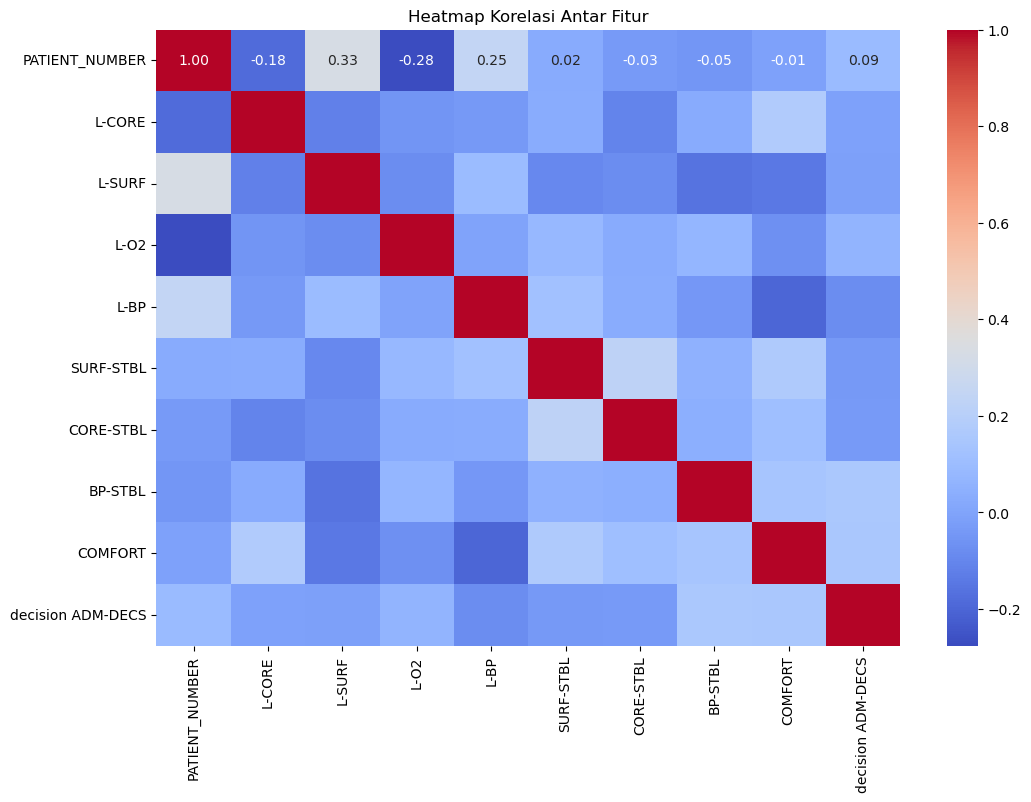

In [14]:
# Langkah : 9 Mengonstruksi Data Dan mengecek nilai heatmap
# Mengecek korelasi antar fitur menggunakan heatmap

# Convert columns with string values to numeric representation
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is of object type (likely string)
        unique_values = df[column].unique()  # Get unique string values in the column
        value_mapping = {value: i for i, value in enumerate(unique_values)}  # Create a mapping from string to integer
        df[column] = df[column].map(value_mapping)  # Apply the mapping to the column

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [15]:
# Langkah 10 : seleksi fitur yang bisa digunakan untuk pemodelan
#menghapus fitur yang tidak dapat digunakan
columns_to_drop = ['PATIENT_NUMBER']  # Corrected column name
dataset = df.drop(columns_to_drop, axis=1)

In [16]:
#menggantikan nilai "?"
dataset.replace("?", np.nan, inplace= True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   L-CORE             89 non-null     int64
 1   L-SURF             89 non-null     int64
 2   L-O2               89 non-null     int64
 3   L-BP               89 non-null     int64
 4   SURF-STBL          89 non-null     int64
 5   CORE-STBL          89 non-null     int64
 6   BP-STBL            89 non-null     int64
 7   COMFORT            89 non-null     int64
 8   decision ADM-DECS  89 non-null     int64
dtypes: int64(9)
memory usage: 6.4 KB


In [18]:
# LANGKAH 11 : SPLITTING DATASET
# Import Library yang dibutuhkan
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import train_test_split

In [19]:
# Assuming 'dataset' contains your preprocessed data
# If not, replace 'dataset' with the correct variable name
X = df.drop("decision ADM-DECS", axis=1)
y = df["decision ADM-DECS"]

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Removed stratify=y

In [21]:
#LANGKAH 12 : NORMALISAI
# Inisialisasi normalizer
from sklearn.preprocessing import Normalizer # Import the Normalizer class
normalizer = Normalizer()

# Normalisasi kolom numerik, kecuali kolom target
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop("decision ADM-DECS")  # Exclude target column

# Hanya normalisasi kolom numerik yang bukan target
df[numeric_columns] = normalizer.fit_transform(df[numeric_columns])


# Hasil
print(df.head())

   PATIENT_NUMBER    L-CORE    L-SURF      L-O2      L-BP  SURF-STBL  \
0        1.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
1        0.755929  0.377964  0.377964  0.000000  0.000000   0.000000   
2        0.801784  0.000000  0.267261  0.267261  0.000000   0.000000   
3        0.894427  0.000000  0.447214  0.000000  0.000000   0.000000   
4        0.845154  0.169031  0.169031  0.169031  0.169031   0.169031   

   CORE-STBL   BP-STBL   COMFORT  decision ADM-DECS  
0   0.000000  0.000000  0.000000                  0  
1   0.000000  0.377964  0.000000                  1  
2   0.267261  0.267261  0.267261                  2  
3   0.000000  0.000000  0.000000                  1  
4   0.000000  0.338062  0.169031                  0  


In [22]:
# LANGKAH 13 : MODEL DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid untuk tuning (bisa disesuaikan dengan kebutuhan)
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [24]:
#GRIDSEARCHCV
# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Latih GridSearchCV dengan data latih
grid_search.fit(X_train, y_train)

# Parameter terbaik
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [25]:
# Evaluasi model terbaik di data uji
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.5555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.59      0.81      0.68        16
           4       0.00      0.00      0.00         1

    accuracy                           0.56        27
   macro avg       0.33      0.34      0.32        27
weighted avg       0.50      0.56      0.50        27



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


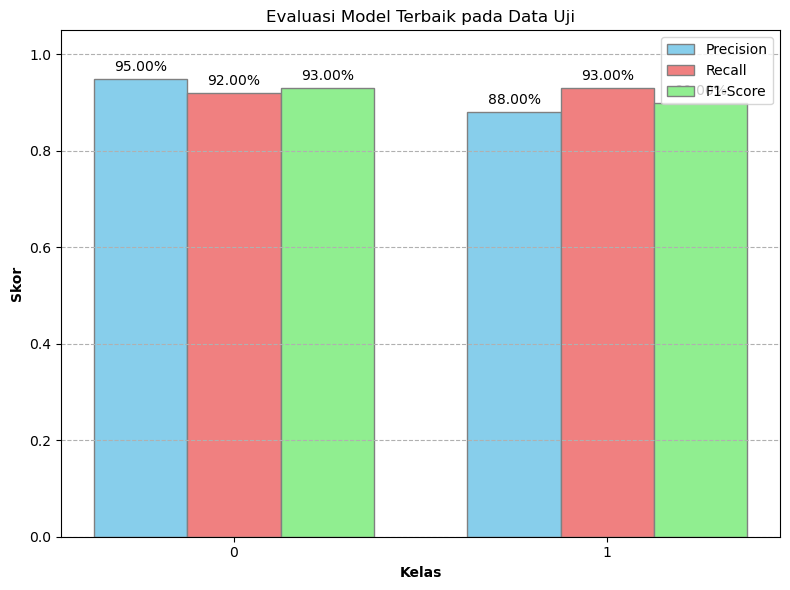

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Hasil Classification Report (ganti dengan hasil sebenarnya dari kode Anda)
report = """
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       100
           1       0.88      0.93      0.90        80

    accuracy                           0.92       180
   macro avg       0.91      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180
"""

# Parse Classification Report
lines = report.strip().split('\n')
class_names = []
precision = []
recall = []
f1_score = []

for line in lines:
    values = line.strip().split()
    if len(values) == 5:  # Baris yang berisi metrik untuk kelas
        try:
            class_names.append(values[0])
            precision.append(float(values[1]))
            recall.append(float(values[2]))
            f1_score.append(float(values[3]))
        except ValueError:
            # Handle kasus jika konversi ke float gagal
            print(f"Peringatan: Tidak dapat mengonversi nilai menjadi float pada baris: {line}")

# Lebar batang
bar_width = 0.25

# Posisi batang untuk setiap metrik
r1 = np.arange(len(class_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Membuat plot
plt.figure(figsize=(8, 6))
bars1 = plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
bars2 = plt.bar(r2, recall, color='lightcoral', width=bar_width, edgecolor='grey', label='Recall')
bars3 = plt.bar(r3, f1_score, color='lightgreen', width=bar_width, edgecolor='grey', label='F1-Score')

# Menambahkan label persentase di atas batang
def add_percentage_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom')

add_percentage_labels(bars1)
add_percentage_labels(bars2)
add_percentage_labels(bars3)

# Menambahkan label pada sumbu x
plt.xlabel('Kelas', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_names))], class_names)

# Menambahkan label pada sumbu y
plt.ylabel('Skor', fontweight='bold')
plt.ylim(0, 1.05)

# Menambahkan judul
plt.title('Evaluasi Model Terbaik pada Data Uji')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()